In [1]:
!pip install tinydb

In [83]:

import seaborn as sns
import plotly.graph_objs as go
import plotly as py
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


In [8]:
from tinydb import TinyDB, Query
db = TinyDB('db.json')

In [19]:
db.truncate()
db.all()

[]

In [20]:
t=[30,45,29,41,54]
c=[50,55,49,71,84]
q=[10,5,9,6,12]
idx=1
for i,j,k in zip(t,c,q):
    db.insert({'id':idx,'time_seconds': i, 'context_length':j ,'query_length':k})
    idx+=1
db.all()

[{'id': 1, 'time_seconds': 30, 'context_length': 50, 'query_length': 10},
 {'id': 2, 'time_seconds': 45, 'context_length': 55, 'query_length': 5},
 {'id': 3, 'time_seconds': 29, 'context_length': 49, 'query_length': 9},
 {'id': 4, 'time_seconds': 41, 'context_length': 71, 'query_length': 6},
 {'id': 5, 'time_seconds': 54, 'context_length': 84, 'query_length': 12}]

In [24]:
visual=Query()
len(db)

5

In [31]:
indext=1
t1=[]
c1=[]
q1=[]

for i in range(len(db)):
    result = db.get(visual.id==i+1)
    t1.append(result.get('time_seconds'))
    c1.append(result.get('context_length'))
    q1.append(result.get('query_length'))
    
 

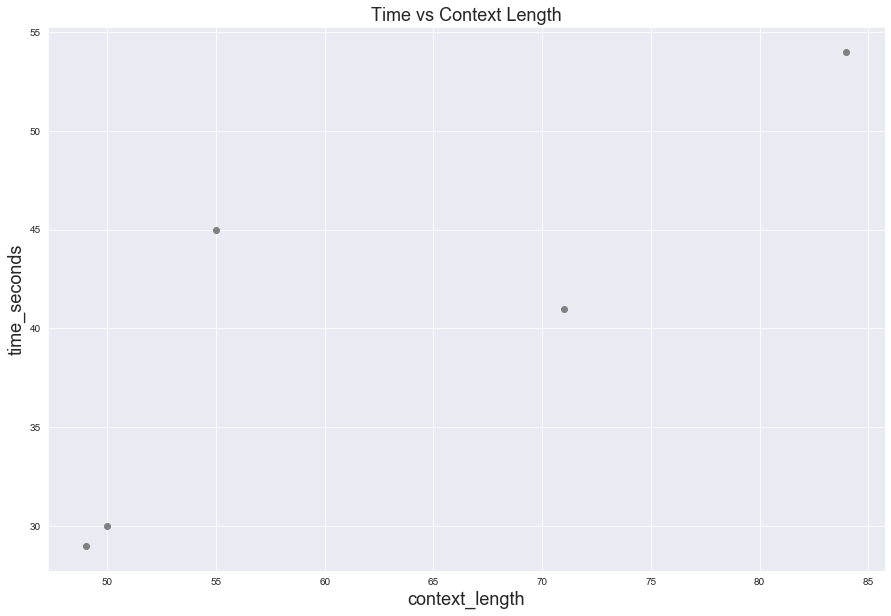

In [69]:
plt.figure(figsize=(15, 10))
plt.scatter(c1,t1,marker='o',color='grey')
plt.xlabel('context_length',fontsize=18)
plt.ylabel('time_seconds',fontsize=18)
plt.title('Time vs Context Length',fontsize=18)
plt.show()

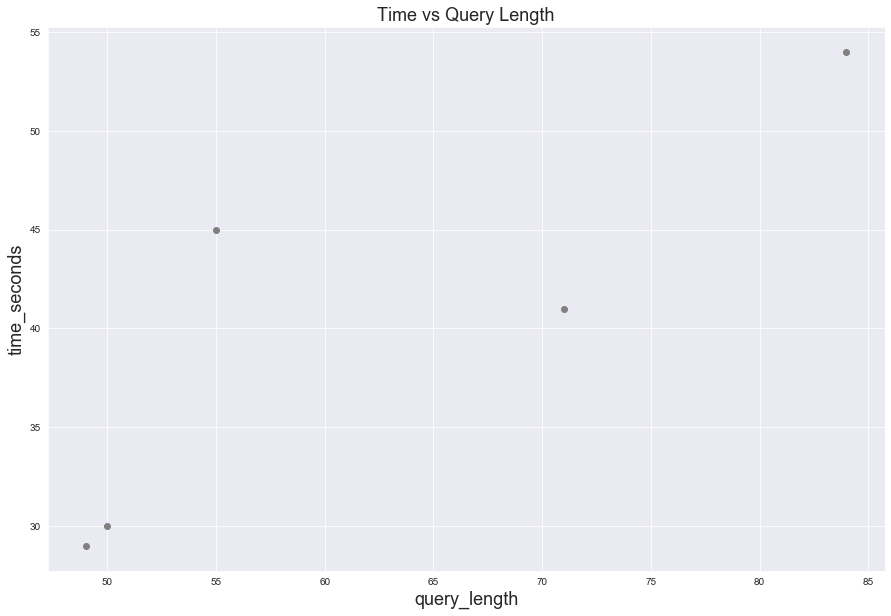

In [68]:
plt.figure(figsize=(15, 10))
plt.scatter(c1,t1,marker='o',color='grey')
plt.xlabel('query_length',fontsize=18)
plt.ylabel('time_seconds',fontsize=18)
plt.title('Time vs Query Length',fontsize=18)
plt.show()

<Figure size 1080x720 with 0 Axes>

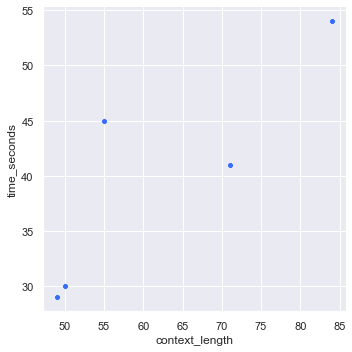

In [88]:
data=pd.DataFrame({"time_seconds":t1,"context_length":c1,"query_length":q1})
plt.figure(figsize=(15, 10))
sns.set_style("darkgrid")

sns.relplot(x="context_length",y="time_seconds",data=data,palette='pastel');
#p.set_axis_labels("context_length", "time_seconds")


<Figure size 1440x360 with 0 Axes>

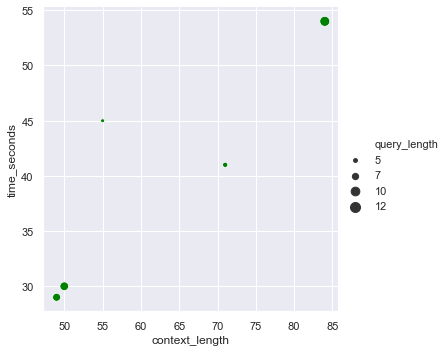

In [87]:
plt.figure(figsize=(20,5))
sns.relplot(x="context_length",y="time_seconds",size='query_length',color='green',sizes=(15,100),data=data,palette='pastel');

In [90]:
db2 = TinyDB('db2.json')

In [91]:
em=[0.78,0.77,0.79,0.79,0.76,0.75]
time=[1,2,3,4,5,6]
F1=[0.68,0.69,0.73,0.72,0.72,0.70]

idx=1
for i,j,k in zip(time,em,F1):
    db2.insert({'id':idx,'time': i, 'EM':j ,'F1_score':k})
    idx+=1
db2.all()

[{'id': 1, 'time': 1, 'EM': 0.78, 'F1_score': 0.68},
 {'id': 2, 'time': 2, 'EM': 0.77, 'F1_score': 0.69},
 {'id': 3, 'time': 3, 'EM': 0.79, 'F1_score': 0.73},
 {'id': 4, 'time': 4, 'EM': 0.79, 'F1_score': 0.72},
 {'id': 5, 'time': 5, 'EM': 0.76, 'F1_score': 0.72},
 {'id': 6, 'time': 6, 'EM': 0.75, 'F1_score': 0.7}]

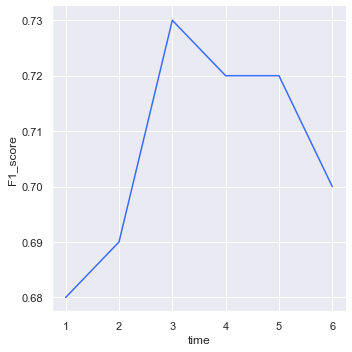

In [92]:
data2=pd.DataFrame({"time":time,"EM":em,"F1_score":F1})
sns.relplot(x="time", y="F1_score",kind="line", data=data2);

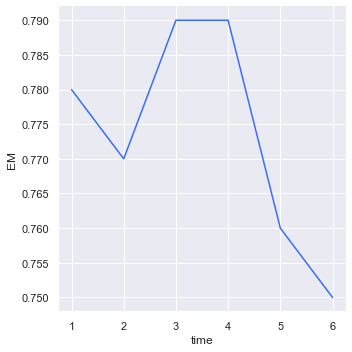

In [95]:
sns.relplot(x="time", y="EM",kind="line", data=data2);


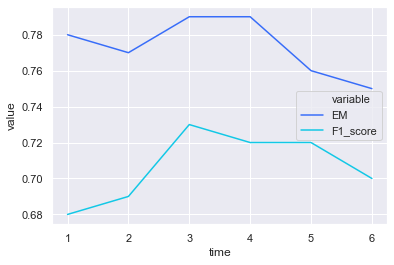

In [96]:
sns.lineplot(x='time', y='value', hue='variable', 
             data=pd.melt(data2, ['time']))